In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st

In [2]:
st.title = "Investment Porfolio"

assets = st.text_input("Provide your assets (comma-separated)", "AAPL, MSFT, GOOGL, BTC")

start= st.date_input("Pick a starting dat for you analysis",
                     value=pd.to_datetime('2023-01-01'))

data=yf.download(assets, start=start)['Adj Close']

2023-06-10 12:32:51.130 
  command:

    streamlit run C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel_launcher.py [ARGUMENTS]


[*********************100%***********************]  4 of 4 completed


In [3]:
ret_df= data.pct_change()
cumul_ret=(ret_df+1).cumprod()-1
pf_cumul_ret=cumul_ret.mean(axis=1)

In [4]:
benchmark = yf.download('^GSPC',start=start)['Adj Close']
bench_ret= benchmark.pct_change()
bench_dev= (bench_ret+1).cumprod()-1

[*********************100%***********************]  1 of 1 completed


In [5]:
W = (np.ones(len(ret_df.cov()))/len(ret_df.cov()))
pf_std=(W.dot(ret_df.cov()).dot(W))**(1/2)

In [6]:
st.subheader("Portfolio vs Index")
tog = pd.concat([bench_dev, pf_cumul_ret],axis=1)
tog.columns = ['S&P500 Performance','Portfolio Performance']

In [8]:
st.subheader("Portfolio Risk:")
pf_std
st.subheader("Benchmark Risk:")
bench_risk=bench_ret.std()
bench_risk

0.00939584850709519

DeltaGenerator()

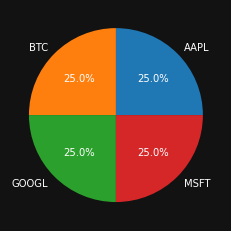

In [9]:
st.subheader("Portfolio composition")
fig, ax= plt.subplots(facecolor='#121212')
ax.pie(W, labels=data.columns, autopct='%1.1f%%',textprops={'color':'white'})
st.pyplot(fig)